<a href="https://colab.research.google.com/github/Leonela180/redes_neuronales/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Instalamos las herramientas necesarias
!pip install pandas scikit-learn matplotlib seaborn tensorflow


In [39]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [41]:
#Cargando datos directamente de Kaggle...")

try:
    # Se ha corregido el nombre del archivo a 'StressLevelDataset.csv'
    # Esta es la ruta correcta para acceder al archivo.
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "mdsultanulislamovi/student-stress-monitoring-datasets",
        "StressLevelDataset.csv"
    )
    print(f"Datos cargados: {len(df)} registros.")
    print("\nVistazo a los primeros datos:")
    print(df.head())
    print("\nColumnas del dataset:", df.columns.tolist())

    # La corrección final: la columna se llama 'stress_level' (minúsculas)
    y = df['stress_level']
    X = df.drop('stress_level', axis=1)
    print("\nVariables de entrada (X) y objetivo (y) definidas.")

    # Dividimos los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalamos los datos para la red neuronal
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

except Exception as e:
    print(f"❌ Error al cargar el dataset de Kaggle: {e}")
    print("El programa se detendrá. Por favor, revisa la conexión y el nombre del archivo.")
    raise


/tmp/ipython-input-3339108009.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Datos cargados: 1100 registros.

Vistazo a los primeros datos:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performanc

In [43]:
#Entrenando el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=50, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
precision_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión de Random Forest: {precision_rf:.0%}")
print("Reporte de clasificación de Random Forest:\n", classification_report(y_test, y_pred_rf))

#Entrenando la Red Neuronal (Deep Learning)
modelo_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
modelo_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Aquí se ha cambiado verbose de 0 a 1 para mostrar el entrenamiento
historial = modelo_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
loss_nn, accuracy_nn = modelo_nn.evaluate(X_test_scaled, y_test)
print(f"Precisión de la Red Neuronal: {accuracy_nn:.0%}")

Precisión de Random Forest: 86%
Reporte de clasificación de Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.90      0.84      0.87        73
           2       0.86      0.86      0.86        71

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5573 - loss: 0.8755
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.4113
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.3131
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8946 - loss: 0.2560
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.2583
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.2493
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9148 - loss: 0.1917
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - loss: 0.1987
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9225 - loss: 0.1826
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9240 - loss: 0.1740
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - loss: 0.1816
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - lo

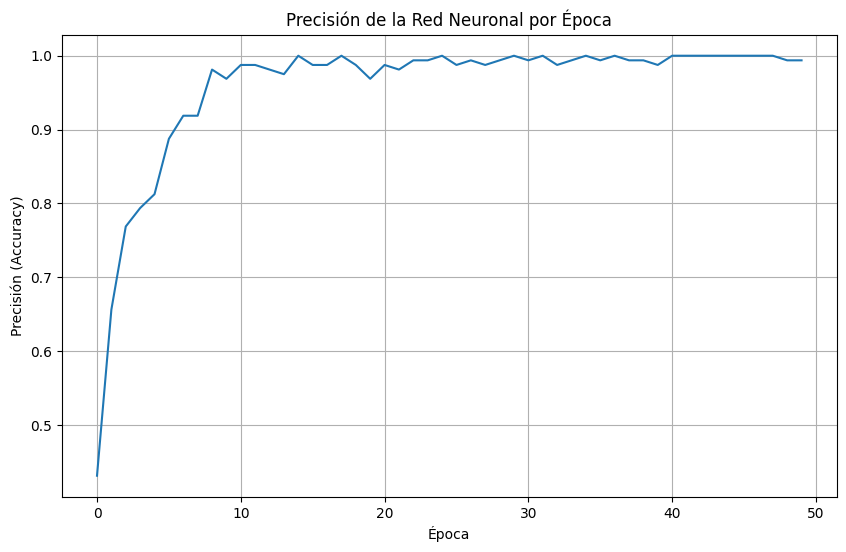

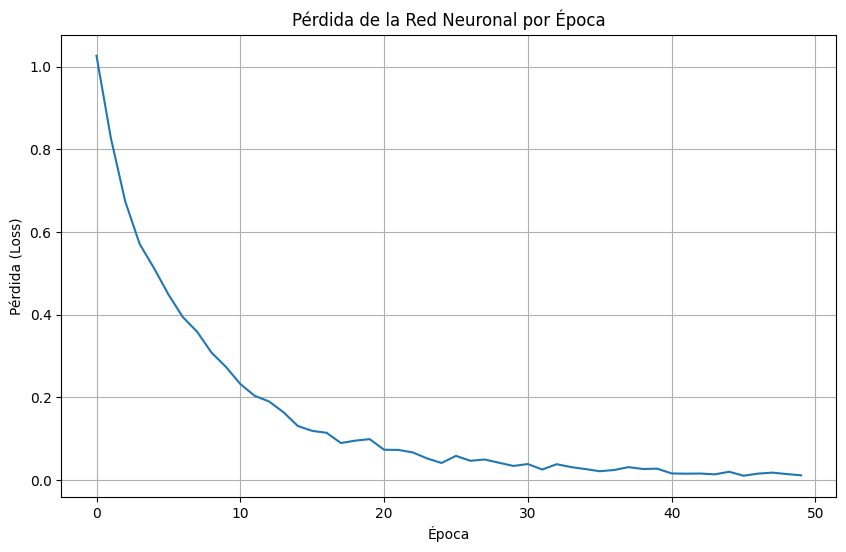

In [19]:
# Gráfico 3: Precisión del entrenamiento por época
plt.figure(figsize=(10, 6))
plt.plot(historial.history['accuracy'])
plt.title('Precisión de la Red Neuronal por Época')
plt.ylabel('Precisión (Accuracy)')
plt.xlabel('Época')
plt.grid(True)
plt.show()

# Gráfico 4: Pérdida del entrenamiento por época
plt.figure(figsize=(10, 6))
plt.plot(historial.history['loss'])
plt.title('Pérdida de la Red Neuronal por Época')
plt.ylabel('Pérdida (Loss)')
plt.xlabel('Época')
plt.grid(True)
plt.show()

/tmp/ipython-input-1776733400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='riesgo', data=df, palette='viridis')


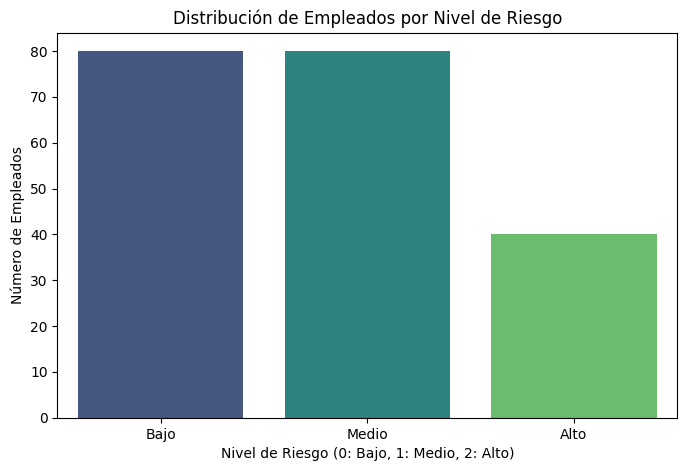

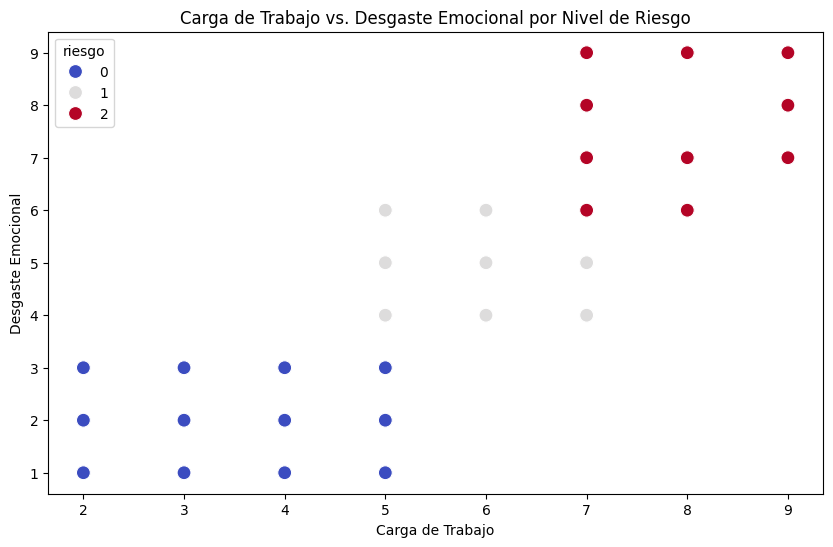

In [12]:
#Generando visualizaciones de la base de datos.

# Gráfico 1: Distribución del nivel de riesgo
plt.figure(figsize=(8, 5))
sns.countplot(x='riesgo', data=df, palette='viridis')
plt.title('Distribución de Empleados por Nivel de Riesgo')
plt.xlabel('Nivel de Riesgo (0: Bajo, 1: Medio, 2: Alto)')
plt.ylabel('Número de Empleados')
plt.xticks(ticks=[0, 1, 2], labels=['Bajo', 'Medio', 'Alto'])
plt.show()

# Gráfico 2: Carga de trabajo vs. Desgaste emocional
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carga_trabajo', y='desgaste_emocional', hue='riesgo', data=df, palette='coolwarm', s=100)
plt.title('Carga de Trabajo vs. Desgaste Emocional por Nivel de Riesgo')
plt.xlabel('Carga de Trabajo')
plt.ylabel('Desgaste Emocional')
plt.show()

In [ ]:
def predecir_riesgo_empleado(datos_empleado):
    """Predice el riesgo de burnout con ambos modelos."""
    datos_df = pd.DataFrame([datos_empleado])
    datos_escalados = scaler.transform(datos_df)

    riesgo_rf = modelo_rf.predict(datos_df)[0]
    riesgo_nn = np.argmax(modelo_nn.predict(datos_escalados, verbose=0), axis=1)[0]

    return riesgo_rf, riesgo_nn

def interpretar_resultado(riesgo):
    """Convierte el número de riesgo en texto."""
    if riesgo == 0:
        return "BAJO RIESGO - Situación normal."
    elif riesgo == 1:
        return "RIESGO MEDIO - Necesita atención."
    else:
        return "ALTO RIESGO - Intervención urgente."

def mostrar_graficos_comparativos(datos_empleado, promedios):
    """Genera gráficos de barras para comparar los datos del empleado."""
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    fig.suptitle('Comparación de tus Datos vs. el Promedio del Grupo de Riesgo', fontsize=16)
    variables = ['carga_trabajo', 'satisfaccion_laboral', 'desgaste_emocional', 'calidad_descanso', 'rendimiento_laboral', 'apoyo_equipo']
    labels = ['Carga de Trabajo', 'Satisfacción Laboral', 'Desgaste Emocional', 'Calidad de Descanso', 'Rendimiento Laboral', 'Apoyo del Equipo']

    for i, var in enumerate(variables):
        row, col = i // 2, i % 2
        ax = axes[row, col]
        tu_dato = datos_empleado[var]
        promedio_grupo = promedios[var]

        # Corregido: Crear un DataFrame para seaborn para evitar la advertencia
        plot_data = pd.DataFrame({
            'Categoría': ['Tus Datos', 'Promedio'],
            'Valor': [tu_dato, promedio_grupo],
            'Tipo': ['Tus Datos', 'Promedio']
        })

        sns.barplot(x='Categoría', y='Valor', hue='Tipo', data=plot_data, ax=ax, palette='coolwarm', legend=False)
        ax.set_title(labels[i])
        ax.set_ylim(0, 10)
        ax.axhline(y=promedio_grupo, color='r', linestyle='--', label=f'Promedio: {promedio_grupo:.1f}')
        ax.legend()
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\n" + "="*50)
print("SISTEMA DE PREDICCIÓN DE RIESGO LABORAL")
print("="*50)

while True:
    print("\n¿Qué desea hacer?")
    print("1. Predecir el riesgo de un nuevo empleado.")
    print("2. Ver ejemplo de predicción.")
    print("3. Salir.")

    opcion = input("Elige una opción (1-3): ")

    if opcion == '1':
        print("\nIngresa los datos del empleado (valores de 1 a 10):")
        try:
            carga = float(input("Carga de trabajo: "))
            satisfaccion = float(input("Satisfacción laboral: "))
            desgaste = float(input("Desgaste emocional: "))
            descanso = float(input("Calidad de descanso: "))
            rendimiento = float(input("Rendimiento laboral: "))
            apoyo = float(input("Apoyo del equipo: "))

            if not all(1 <= x <= 10 for x in [carga, satisfaccion, desgaste, descanso, rendimiento, apoyo]):
                print("Error: Todos los valores deben estar entre 1 y 10.")
                continue

            nuevo_empleado = {
                'carga_trabajo': carga, 'satisfaccion_laboral': satisfaccion,
                'desgaste_emocional': desgaste, 'calidad_descanso': descanso,
                'rendimiento_laboral': rendimiento, 'apoyo_equipo': apoyo
            }

            riesgo_rf, riesgo_nn = predecir_riesgo_empleado(nuevo_empleado)

            print("\nRESULTADOS DE PREDICCIÓN:")
            print("="*30)
            print(f"Random Forest: {interpretar_resultado(riesgo_rf)}")
            print(f"Red Neuronal: {interpretar_resultado(riesgo_nn)}")

            promedios_riesgo = df[df['riesgo'] == riesgo_rf].mean()
            mostrar_graficos_comparativos(nuevo_empleado, promedios_riesgo)

        except ValueError:
            print("Error: Ingresa un número válido en cada campo.")

    elif opcion == '2':
        print("\nEjemplo de predicción:")

        empleado_bueno = {'carga_trabajo': 4, 'satisfaccion_laboral': 8, 'desgaste_emocional': 3, 'calidad_descanso': 9, 'rendimiento_laboral': 7, 'apoyo_equipo': 8}
        empleado_riesgo = {'carga_trabajo': 9, 'satisfaccion_laboral': 2, 'desgaste_emocional': 8, 'calidad_descanso': 3, 'rendimiento_laboral': 4, 'apoyo_equipo': 2}

        riesgo1_rf, riesgo1_nn = predecir_riesgo_empleado(empleado_bueno)
        riesgo2_rf, riesgo2_nn = predecir_riesgo_empleado(empleado_riesgo)

        print(f"\nEmpleado con bajo riesgo:")
        print(f"  Random Forest: {interpretar_resultado(riesgo1_rf)}")
        print(f"  Red Neuronal: {interpretar_resultado(riesgo1_nn)}")

        print(f"\nEmpleado con alto riesgo:")
        print(f"  Random Forest: {interpretar_resultado(riesgo2_rf)}")
        print(f"  Red Neuronal: {interpretar_resultado(riesgo2_nn)}")

    elif opcion == '3':
        print("Hasta luego. Gracias por usar el sistema.")
        break

    else:
        print("Opción no válida. Intenta de nuevo.")


SISTEMA DE PREDICCIÓN DE RIESGO LABORAL

¿Qué desea hacer?
1. Predecir el riesgo de un nuevo empleado.
2. Ver ejemplo de predicción.
3. Salir.
